# Importing libraries and datasets

In [13]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [30]:
with open('/content/drive/MyDrive/Heart Disease Prediction/Datasets/df_combined.pickle', 'rb') as f:
    df = pickle.load(f)

# Plotting feature distributions

Text(0.5, 1.0, 'Heart disease diagnosis by chest pain type')

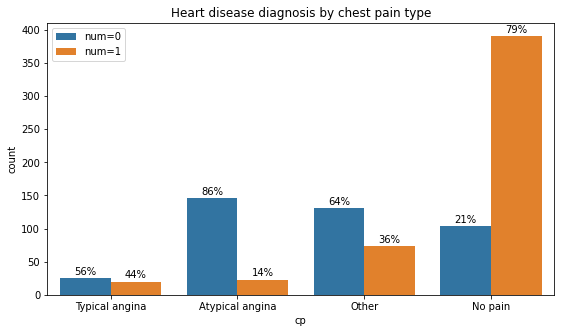

In [40]:
fig, ax = plt.subplots(figsize=(20,5))
plt.subplot(121)
ax = sns.countplot(x='cp', data=df, hue='num')
bars = ax.patches
half = int(len(bars)/2)
left_bars, right_bars = bars[:half], bars[half:]
for left, right in zip(left_bars, right_bars):
    left_height, right_height = left.get_height(), right.get_height()
    if np.isnan(left_height):
        left_height = 0
    if np.isnan(right_height):
        right_height = 0
    total_height = left_height + right_height
    ax.text(left.get_x() + left.get_width() / 2., left_height + 5, '{0:.0%}'.format(left_height / total_height), ha="center")
    ax.text(right.get_x() + right.get_width() / 2., right_height + 5, '{0:.0%}'.format(right_height / total_height), ha="center")
ax.legend(["num=0", "num=1"])
ax.set_xticklabels(["Typical angina", "Atypical angina", "Other", "No pain"])
ax.set_title('Heart disease diagnosis by chest pain type')

Text(0.5, 1.0, 'Heart disease diagnosis by occurrence of exercise-induced angina')

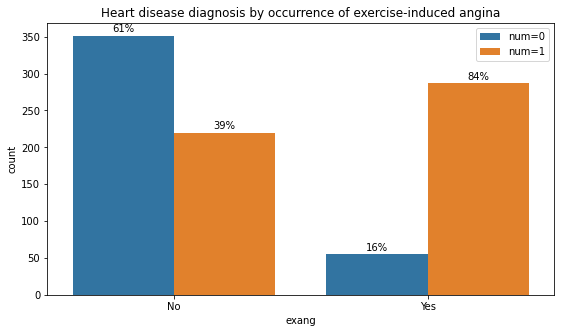

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
plt.subplot(121)
ax = sns.countplot(x='exang', data=df, hue='num')
bars = ax.patches
half = int(len(bars)/2)
left_bars, right_bars = bars[:half], bars[half:]
for left, right in zip(left_bars, right_bars):
    left_height, right_height = left.get_height(), right.get_height()
    if np.isnan(left_height):
        left_height = 0
    if np.isnan(right_height):
        right_height = 0
    total_height = left_height + right_height
    ax.text(left.get_x() + left.get_width() / 2., left_height + 5, '{0:.0%}'.format(left_height / total_height), ha="center")
    ax.text(right.get_x() + right.get_width() / 2., right_height + 5, '{0:.0%}'.format(right_height / total_height), ha="center")
ax.legend(["num=0", "num=1"])
ax.set_xticklabels(["No", "Yes"])
ax.set_title('Heart disease diagnosis by occurrence of exercise-induced angina')

# Normalizing data

In [26]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame({'age': df[:, 0], 'sex': df[:, 1], 'cp': df[:, 2], 'trestbps': df[:, 3], 'chol': df[:, 4], 'fbs': df[:, 5], 'restecg': df[:, 6], 'thalach': df[:, 7],
                   'exang': df[:, 8], 'oldpeak': df[:, 9], 'slope': df[:, 10], 'thal': df[:, 11], 'num': df[:, 12], 'age_bracket': df[:, 13]})

# Plotting correlation matrix

Text(0.5, 1.0, 'Correlation Matrix of Features')

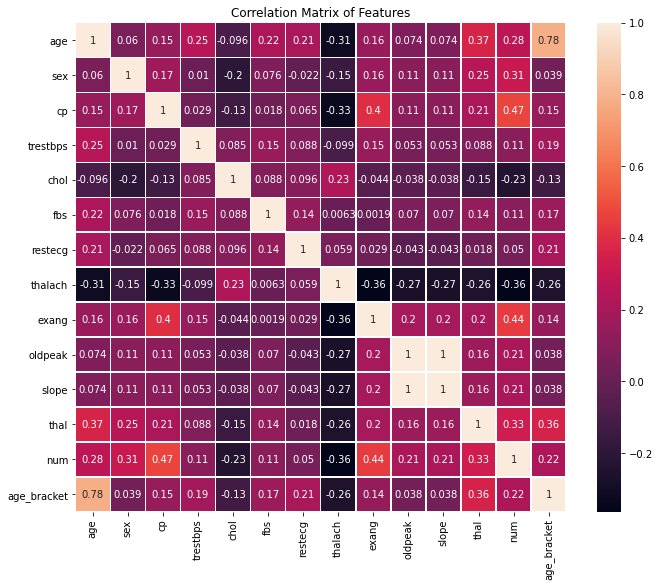

In [28]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(), linewidths = 0.5, annot=True)
plt.title("Correlation Matrix of Features")